In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import re
import pprint

import folium
from folium.plugins import MarkerCluster
import googlemaps
import geopandas as gpd

import requests
import json
import time

import warnings
warnings.filterwarnings(action='ignore')

In [19]:
df = pd.read_csv('./datasets/버스중구3월.csv')
df.head()

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd,동
0,2022-03-01,2022,3,1,1102073,786,1,0,5,1,동화동
1,2022-03-01,2022,3,1,1102068,2367,1,0,15,1,중림동
2,2022-03-01,2022,3,1,1102059,7777,1,0,94,1,광희동
3,2022-03-01,2022,3,1,1102054,17543,1,0,161,1,회현동
4,2022-03-01,2022,3,1,1102052,15399,1,0,54,1,소공동


In [31]:
df.value_counts('hh','g_cnt','wd')

hh
0     0.041667
1     0.041667
22    0.041667
21    0.041667
20    0.041667
19    0.041667
18    0.041667
17    0.041667
16    0.041667
15    0.041667
14    0.041667
13    0.041667
12    0.041667
11    0.041667
10    0.041667
9     0.041667
8     0.041667
7     0.041667
6     0.041667
5     0.041667
4     0.041667
3     0.041667
2     0.041667
23    0.041667
dtype: float64

In [ ]:
공휴일 주말 에 대한 시간별 이용률

공휴일 주중에 대한 시간별 이용률

In [45]:
df[df['wd']==0]['g_cnt']

15         8
16         8
17       110
18        74
19       170
        ... 
11155     86
11156    130
11157    243
11158    182
11159     76
Name: g_cnt, Length: 7560, dtype: int64

중구 3월 plotly

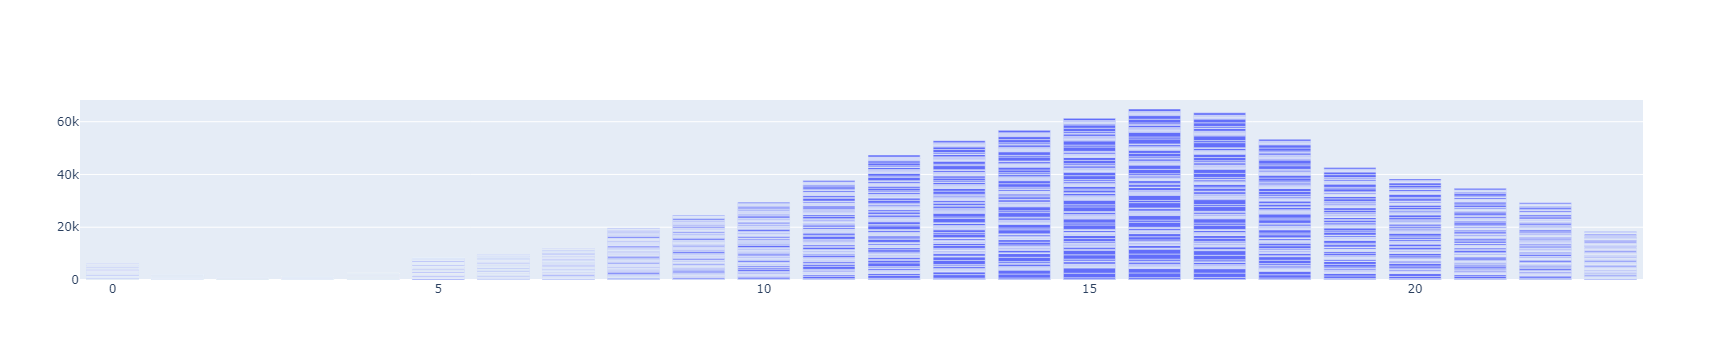

In [61]:
df = pd.read_csv('./datasets/버스중구3월.csv')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df[df['wd']==1]['hh'],
    y=df[df['wd']==1]['g_cnt']
))


fig.show()

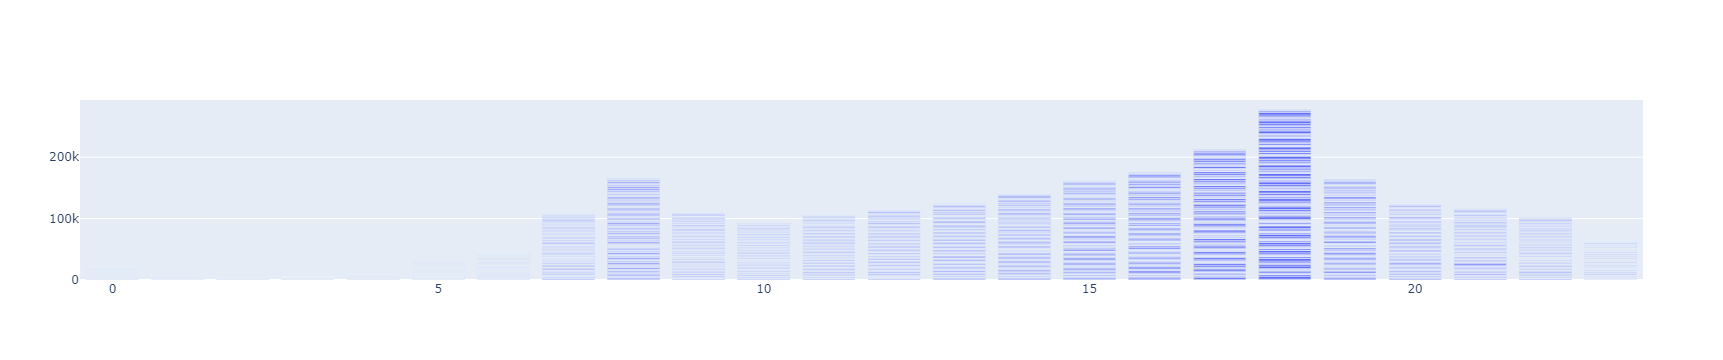

In [62]:
df = pd.read_csv('./datasets/버스중구3월.csv')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df[df['wd']==0]['hh'],
    y=df[df['wd']==0]['g_cnt']
))


fig.show()

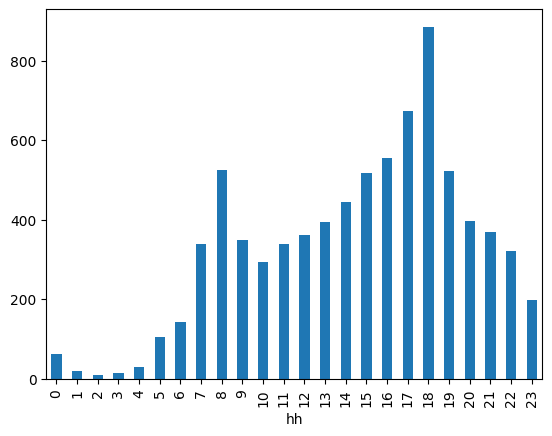

In [43]:
df[df['wd']==0].groupby('hh')['g_cnt'].mean().plot(kind='bar')
plt.show()

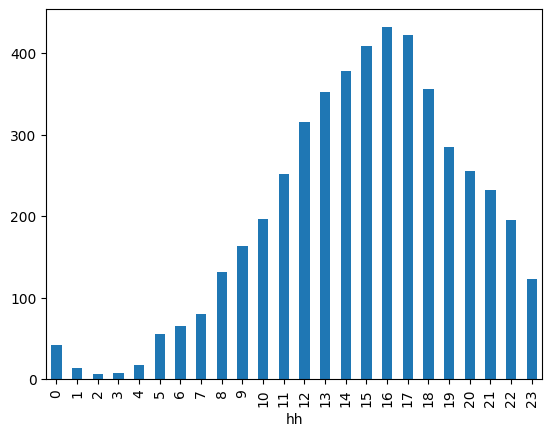

In [50]:
df[df['wd']==1].groupby('hh')['g_cnt'].mean().plot(kind='bar')
plt.show()

In [24]:
df.sort_index(ascending=False)

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd,동
11159,2022-03-31,2022,3,31,1102067,3545,3,23,76,0,황학동
11158,2022-03-31,2022,3,31,1102060,4036,3,23,182,0,을지로동
11157,2022-03-31,2022,3,31,1102065,5732,3,23,243,0,신당5동
11156,2022-03-31,2022,3,31,1102069,4173,3,23,130,0,신당동
11155,2022-03-31,2022,3,31,1102070,3608,3,23,86,0,다산동
...,...,...,...,...,...,...,...,...,...,...,...
4,2022-03-01,2022,3,1,1102052,15399,1,0,54,1,소공동
3,2022-03-01,2022,3,1,1102054,17543,1,0,161,1,회현동
2,2022-03-01,2022,3,1,1102059,7777,1,0,94,1,광희동
1,2022-03-01,2022,3,1,1102068,2367,1,0,15,1,중림동


In [ ]:
공휴일 주말 에 대한 시간별 이용률

공휴일 주중에 대한 시간별 이용률

In [53]:
df.head()

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd,동
0,2022-03-01,2022,3,1,1102073,786,1,0,5,1,동화동
1,2022-03-01,2022,3,1,1102068,2367,1,0,15,1,중림동
2,2022-03-01,2022,3,1,1102059,7777,1,0,94,1,광희동
3,2022-03-01,2022,3,1,1102054,17543,1,0,161,1,회현동
4,2022-03-01,2022,3,1,1102052,15399,1,0,54,1,소공동


<Axes: xlabel='wd', ylabel='g_cnt'>

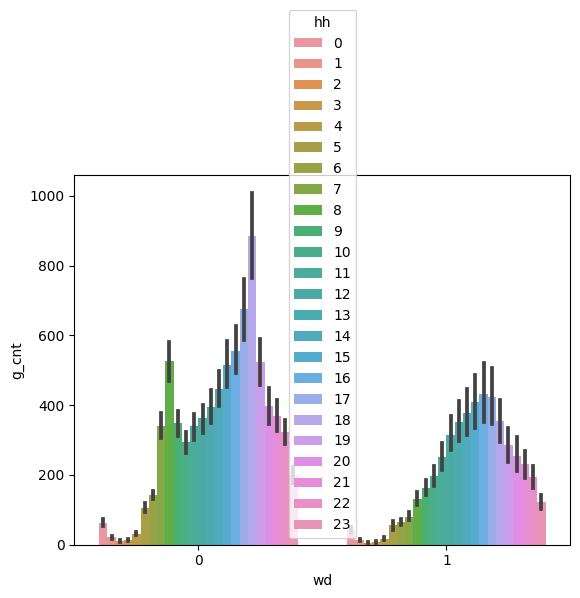

In [57]:
sns.barplot(data=df, x='wd',y='g_cnt', hue="hh")

In [ ]:

fig = go.Figure()
fig.add_trace(go.Bar(
    
fig = px.figure(data = px.Bar(

In [18]:
df = pd.read_csv('./datasets/bus_time_table.csv', encoding='cp949', sep=',', parse_dates=['기준_날짜'])
df.columns = bus_time_table.columns.str.lower()
df.head()

,기준_날짜,행정동_id,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시
0,2023-02-15,1124082,15015.0,67.0,75.0,42.0,42.0,117.0,269.0,717.0,...,602.0,658.0,777.0,872.0,1095.0,806.0,471.0,412.0,465.0,128.0
1,2023-02-15,1124081,11184.0,35.0,54.0,22.0,6.0,148.0,187.0,418.0,...,518.0,523.0,659.0,783.0,1085.0,622.0,482.0,443.0,388.0,103.0
2,2023-02-15,1106091,8005.0,19.0,0.0,0.0,0.0,58.0,161.0,344.0,...,352.0,344.0,400.0,454.0,656.0,437.0,301.0,230.0,236.0,101.0
3,2023-02-15,1111079,10749.0,81.0,60.0,39.0,32.0,144.0,213.0,308.0,...,488.0,598.0,553.0,649.0,847.0,776.0,532.0,505.0,455.0,259.0
4,2023-02-15,1121069,22002.0,224.0,51.0,33.0,22.0,82.0,224.0,463.0,...,948.0,1099.0,1287.0,1624.0,2314.0,2156.0,1561.0,1546.0,1559.0,886.0


In [19]:
df.isna()

,기준_날짜,행정동_id,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173837,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173838,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from datetime import date

In [28]:
df['y'] = df['date'].dt.year
df['m'] = df['date'].dt.month
df['d'] = df['date'].dt.day